In [46]:
#Experiment2
import datetime
import pandas as pd 
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import math

#打开一个之前存好数据的文件
fsplit = open('./microsoft_half.csv','r')
lines_label = fsplit.readlines()
fsplit.close()
close = list()
for each in lines_label[1:]:
    tokens = each.split(',')
    close.append(tokens[4])
closed = close[::-1]
dateX = np.arange(1,len(closed)+1)
X = np.array(closed,dtype='float32')

#计算Hurst指数，通过重极差法（R/S）
def calHurst(X):
    N = len(X)
    n = range(20,40)
    m = [int(N/i) for i in n]
    F = list()
    for i in range(20):
        Fsum = 0.0
        for j in range(m[i]):
            if (j+1)*n[i]>N:
                x = X[j*n[i]:]
                xl = N - j*n[i]
            else:
                x = X[j*n[i]:(j+1)*n[i]]
                xl = n[i]
            x_ave = sum(x)/xl
            std = 0.0
            for k in x:
                std = std+(k-x_ave)**2
            R = std-(x[0]-x_ave)**2
            std = math.sqrt(std/xl)
            Fsum = Fsum+R/std
        F.append(Fsum/m[i])
    return F


In [41]:
F = calHurst(X)
lnF = [math.log(i) for i in F]
lnN = [math.log(i) for i in range(20,40)]
#最小二乘拟合得到最终的H
ro = np.polyfit(lnF,lnN,deg=1)
ro

array([0.50312342, 1.67722673])

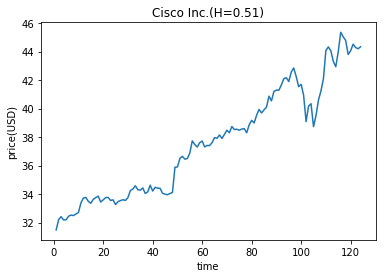

In [42]:
plt.plot(dateX,X)
plt.title("Cisco Inc.(H=0.51)")
plt.xlabel("time")
plt.ylabel("price(USD)")
plt.show()

In [9]:
range(1,len(closed)+1)

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124]

In [47]:
closed

['73.98',
 '74.76',
 '74.68',
 '75.21',
 '74.77',
 '75.31',
 '75.16',
 '75.44',
 '74.94',
 '74.21',
 '74.41',
 '73.26',
 '73.26',
 '73.85',
 '73.87',
 '74.49',
 '74.61',
 '74.26',
 '74.69',
 '75.97',
 '76.0',
 '76.29',
 '76.29',
 '76.42',
 '77.12',
 '77.49',
 '77.65',
 '77.59',
 '77.61',
 '77.91',
 '78.81',
 '78.83',
 '78.86',
 '78.63',
 '78.76',
 '83.81',
 '83.89',
 '83.18',
 '83.18',
 '84.05',
 '84.14',
 '84.47',
 '84.27',
 '84.09',
 '83.87',
 '83.93',
 '84.05',
 '82.98',
 '83.2',
 '82.4',
 '82.53',
 '83.72',
 '83.11',
 '83.26',
 '83.87',
 '84.88',
 '83.34',
 '84.17',
 '84.26',
 '81.08',
 '81.59',
 '82.78',
 '82.49',
 '84.16',
 '85.23',
 '85.58',
 '85.35',
 '84.69',
 '86.85',
 '86.38',
 '85.83',
 '85.52',
 '85.5',
 '85.51',
 '85.4',
 '85.71',
 '85.72',
 '85.54',
 '85.95',
 '86.35',
 '87.11',
 '88.19',
 '88.28',
 '88.22',
 '87.82',
 '88.08',
 '89.58',
 '88.35',
 '90.14',
 '90.1',
 '90.0',
 '91.61',
 '91.9',
 '91.82',
 '92.33',
 '94.06',
 '93.92',
 '92.74',
 '95.01',
 '94.26',
 '91.78'

In [48]:
len(closed)

124